# Librerías y lectura

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [3]:
df = pd.read_csv('./Dataset_TP/train/_annotations.csv')

# Datos generales

In [4]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Foto-Placa-463-_jpg.rf.3bcf1a5eee313dec384ed6e...,640,640,placa,224,386,257,399
1,Foto-Placa-463-_jpg.rf.3bcf1a5eee313dec384ed6e...,640,640,placa,269,99,285,107
2,Foto-Placa-463-_jpg.rf.3bcf1a5eee313dec384ed6e...,640,640,placa,521,193,540,202
3,2023-05-09-07-26-37-29956-1425520mp4_1425522_j...,640,640,placa,322,164,389,219
4,27-de-abril-9_jpg.rf.8775093de7a3c51d555e0ec69...,640,640,placa,341,424,370,457


In [13]:
def img_rgb():
  img_nor=[]
  for i in range(50):
    image_col = 'filename'
    image_ruta = './Dataset_TP/train'
    img_name = df[image_col][i] # Imagen por imagen, toma nombre del archivo
    img_path = os.path.join(image_ruta, img_name) # Unir rutas
    img = cv.imread(img_path) # Lectura mediante OpenCV
    if img is not None:
      img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
      img_norm= img_rgb / 255.0 # Imágenes normalizadas para siempre jamás (0-1)
      img_nor.append(img_norm)
  return img_nor

# Mostrar las primeras 12 imágenes
img_out = img_rgb()

In [14]:
def show_img(arr, title=None):
    plt.figure(figsize=(4,4))
    plt.imshow(arr, interpolation='nearest', cmap=None)
    plt.axis('off')
    if title: plt.title(title)
    plt.show()

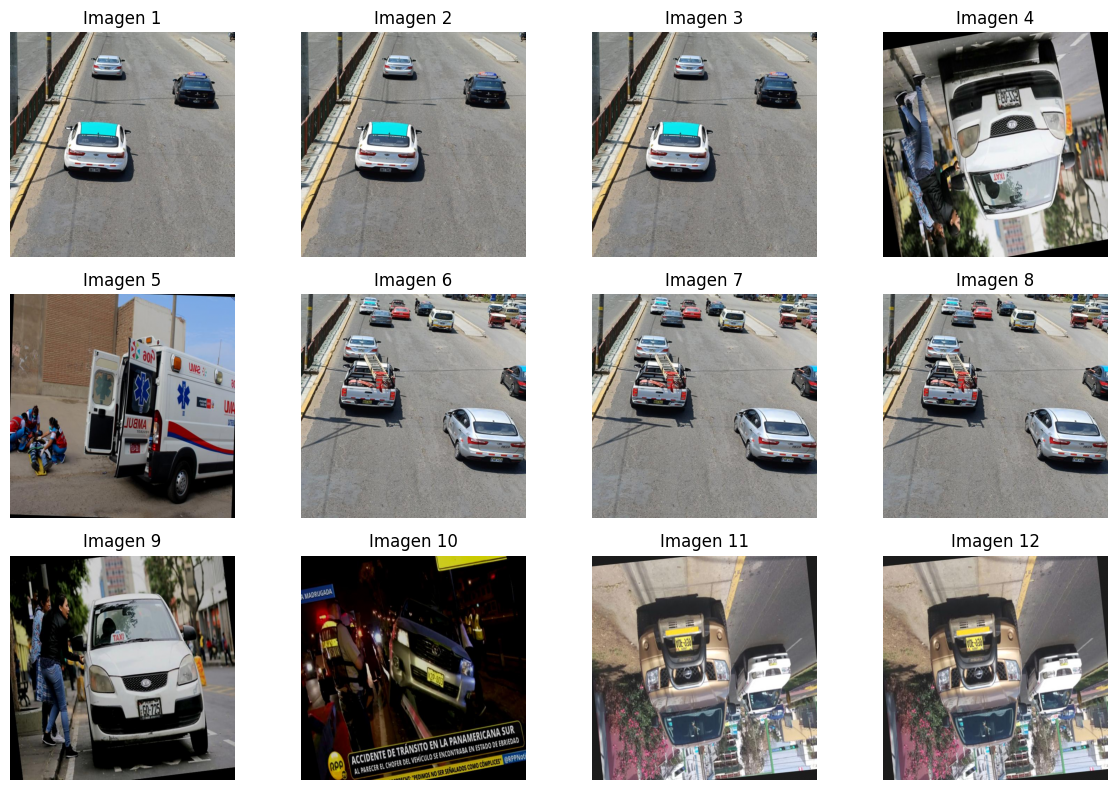

In [15]:
imgs = img_rgb()

plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
    plt.title(f"Imagen {i+1}")
plt.tight_layout()
plt.show()

In [10]:
# Tamaño del DataFrame
tamaño = df.size

# Datos únicos en la columna filename
unicos = df["filename"].nunique()

# Conteo de ocurrencias de cada archivo
conteo = df["filename"].value_counts().reset_index()["count"].value_counts()

In [ ]:
print(f"Tamaño del DataFrame: {tamaño}")
print(f"Número de archivos únicos: {unicos}")
print("Conteo de ocurrencias de cada archivo:")
print(conteo)

# Gráficos

Text(0, 0.5, 'Número de imágenes')

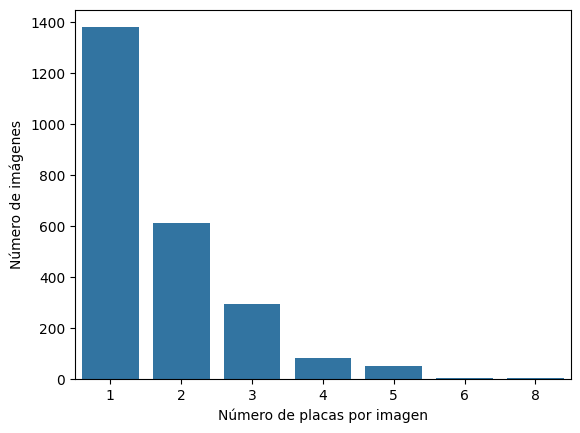

In [7]:
sns.barplot(df["filename"].value_counts().reset_index()["count"].value_counts())
plt.xlabel("Número de placas por imagen")
plt.ylabel("Número de imágenes")

# ANÁLISIS GEOMÉTRICO

## Dimensiones de la Región de Placa (Bounding Box)

### Ancho de las placas

Text(0.5, 1.0, 'Boxplot del Ancho de las Placas')

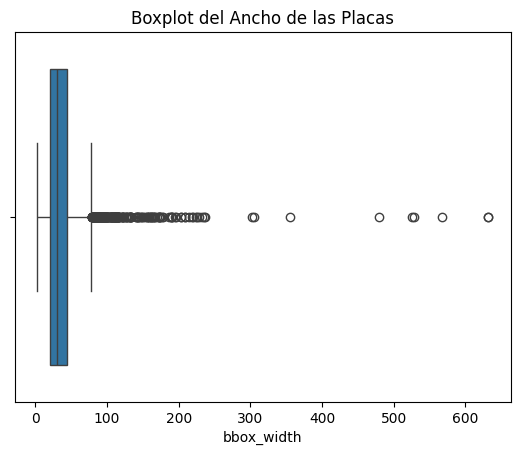

In [15]:
#Ancho de bbox: Distribución, media, mediana, rango
df['bbox_width'] = df['xmax'] - df['xmin']

sns.boxplot(x=df["bbox_width"])
plt.title('Boxplot del Ancho de las Placas')

In [16]:
df['bbox_width'].describe().reset_index()

,index,bbox_width
0,count,4144.000000
1,mean,38.033060
2,std,33.445026
3,min,3.000000
4,25%,21.000000
5,50%,31.000000
6,75%,44.000000
7,max,632.000000


### Alto de las placas

Text(0.5, 1.0, 'Boxplot del Ancho de las Placas')

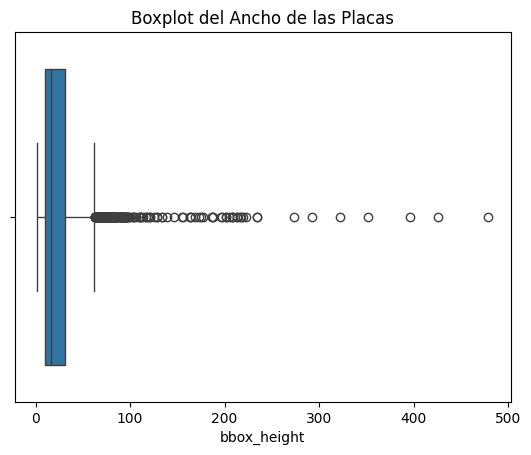

In [17]:
#Alto de bbox: Distribución, media, mediana, rango
df['bbox_height'] = df['ymax'] - df['ymin']

sns.boxplot(x=df["bbox_height"])
plt.title('Boxplot del Ancho de las Placas')

In [18]:
df['bbox_height'].describe().reset_index()

,index,bbox_height
0,count,4144.000000
1,mean,24.984556
2,std,27.928873
3,min,2.000000
4,25%,10.000000
5,50%,16.000000
6,75%,31.000000
7,max,479.000000


### Área total de las placas

In [19]:
# Área total: Histograma de tamaños
df['bbox_area'] = df['bbox_width'] * df['bbox_height']

Text(0, 0.5, 'Frecuencia')

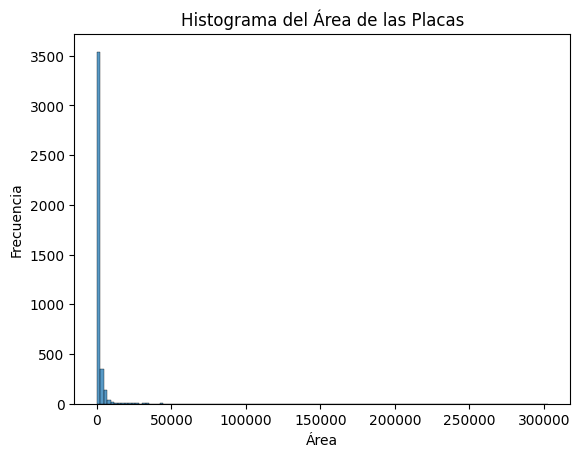

In [20]:
sns.histplot(df['bbox_area'])
plt.title('Histograma del Área de las Placas')
plt.xlabel('Área')
plt.ylabel('Frecuencia')

Para verificar los datos del histograma, hacemos un conteo para todas las áreas que cumplan con los rangos

In [34]:
menos_50000 = df[df["bbox_area"] <= 50000]
print(f"Número de placas con área mayor a 50 000: {menos_50000.shape[0]}")

entre_50000_y_100000 = df[(df["bbox_area"] > 50000) & (df["bbox_area"] <= 100000)]
print(f"Número de placas con área entre 100 000 y 500 000: {entre_50000_y_100000.shape[0]}")

entre_100000_y_150000 = df[(df["bbox_area"] > 100000) & (df["bbox_area"] <= 150000)]
print(f"Número de placas con área entre 100 000 y 150 000: {entre_100000_y_150000.shape[0]}")

entre_150000_y_200000 = df[(df["bbox_area"] > 150000) & (df["bbox_area"] <= 200000)]
print(f"Número de placas con área entre 150 000 y 200,000: {entre_150000_y_200000.shape[0]}")

entre_200000_y_250000 = df[(df["bbox_area"] > 200000) & (df["bbox_area"] <= 250000)]
print(f"Número de placas con área entre 200 000 y 250 000: {entre_200000_y_250000.shape[0]}")

mas_250000 = df[df["bbox_area"] > 250000]
print(f"Número de placas con área mayor a 250 000: {mas_250000.shape[0]}")



Número de placas con área mayor a 50 000: 4133
Número de placas con área entre 100 000 y 500 000: 5
Número de placas con área entre 100 000 y 150 000: 1
Número de placas con área entre 150 000 y 200,000: 2
Número de placas con área entre 200 000 y 250 000: 1
Número de placas con área mayor a 250 000: 2


### Aspect Ratio (Relación de aspecto)

In [23]:
df["aspect_ratio"] = df['bbox_width'] / df['bbox_height']

<Axes: xlabel='aspect_ratio', ylabel='Count'>

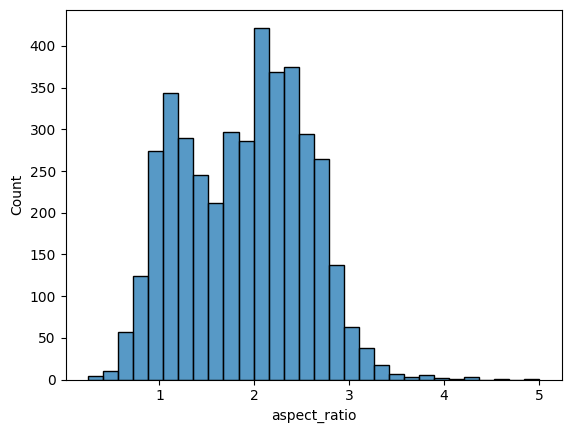

In [24]:
sns.histplot(df["aspect_ratio"], bins=30)

In [25]:
df[df["aspect_ratio"] > 4]

,filename,width,height,class,xmin,ymin,xmax,ymax,bbox_width,bbox_height,bbox_area,aspect_ratio
224,Foto-Placa-222-_jpg.rf.bf1a31d558be3546315d12b...,640,640,placa,247,627,300,640,53,13,689,4.076923
341,Foto-Placa-222-_jpg.rf.ba39f3583474912883332fc...,640,640,placa,324,32,376,44,52,12,624,4.333333
926,Foto-Placa-7-_jpg.rf.df1f390397983d7f6a0bdf487...,640,640,placa,120,610,152,617,32,7,224,4.571429
2429,Foto-Placa-248-_jpg.rf.51f2ded407a4dc2990b8585...,640,640,placa,386,0,401,3,15,3,45,5.000000
2441,Foto-Placa-260-_jpg.rf.b4a95019aa454f66be0090e...,640,640,placa,55,313,89,321,34,8,272,4.250000
2623,Foto-Placa-294-_jpg.rf.d54523456f7224b461c3c03...,640,640,placa,330,0,347,4,17,4,68,4.250000


Text(0.5, 1.0, 'Relación entre Ancho y Alto de las Placas')

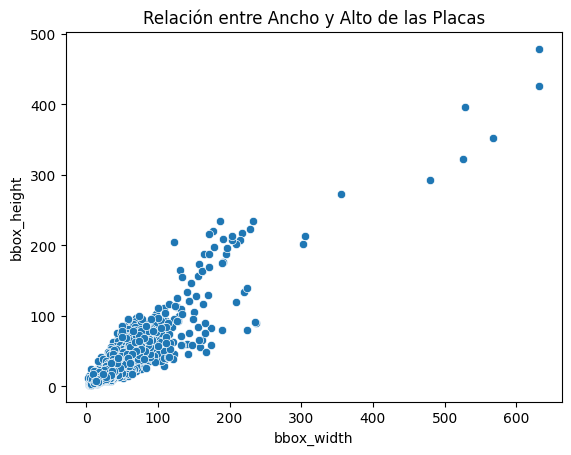

In [26]:
sns.scatterplot(data=df, x='bbox_width', y='bbox_height')
plt.title('Relación entre Ancho y Alto de las Placas')

Tamaño relativo:



In [27]:
relativo = (df["height"]*df["width"]) / df["bbox_area"]

In [28]:
relativo.head()

0     954.778555
1    3200.000000
2    2395.321637
3     111.153324
4     428.004180
dtype: float64

Text(0, 0.5, 'Frecuencia')

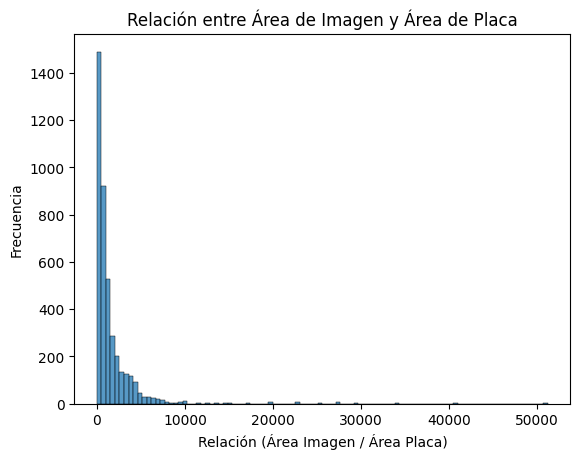

In [29]:
sns.histplot(relativo, bins=100)
plt.title('Relación entre Área de Imagen y Área de Placa')
plt.xlabel('Relación (Área Imagen / Área Placa)')
plt.ylabel('Frecuencia')

### Posición en la Imagen

Ubicación espacial:



In [33]:
dist_left = df['xmin']
dist_right = df['width'] - df['xmax']
dist_top = df['ymin']
dist_bottom = df['height'] - df['ymax']
min_dist_border = pd.concat([dist_left, dist_right, dist_top, dist_bottom], axis=1).min(axis=1)

placas_cortadas = df[min_dist_border < 5].copy()
placas_cortadas = placas_cortadas.assign(
    min_dist_border=min_dist_border[min_dist_border < 5],
    dist_left=dist_left[min_dist_border < 5],
    dist_right=dist_right[min_dist_border < 5],
    dist_top=dist_top[min_dist_border < 5],
    dist_bottom=dist_bottom[min_dist_border < 5]
)
placas_cortadas[['filename', 'min_dist_border', 'dist_left', 'dist_right', 'dist_top', 'dist_bottom']]

,filename,min_dist_border,dist_left,dist_right,dist_top,dist_bottom
62,Foto-Placa-15-_jpg.rf.4bf0b1275c2947807e395918...,4,176,448,4,629
90,Foto-Placa-193-_jpg.rf.db9ffc303dd04f319eb6c2c...,0,0,606,549,79
114,25309b30-5657-11ee-9210-f7c57cc6fb16_png.rf.64...,0,465,111,0,604
169,Foto-Placa-196-_jpg.rf.e9dad54598275827ae6c6ae...,0,339,277,629,0
172,Foto-Placa-200-_jpg.rf.d12709bf468b47b343a77bf...,0,616,0,359,264
...,...,...,...,...,...,...
3920,Foto-Placa-40-_jpg.rf.ba1a41310e03ee08ded82203...,2,229,386,627,2
4029,Foto-Placa-398-_jpg.rf.b1fc2c195dbef116b367374...,0,0,620,115,511
4087,20231009_201533_jpg.rf.749d24a0804f82ade26a37f...,2,620,2,293,327
4109,25309b30-5657-11ee-9210-f7c57cc6fb16_png.rf.fa...,0,119,457,623,0
